# Background Information on Datasets

# 1. Load Required Libraries

In [51]:
# Load Required Libraries
import pandas as pd; 
import numpy as np; 
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.figure import Figure
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')
import param
#import hvplot.pandas
#import panel as pn
#pn.extension()
#mpl.use('agg')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
import pickle
import joblib


# Read Data Files

In [52]:
# Read Data Files
dataset1_csv_file = "data/Dataset2.csv"
df1 = pd.read_csv(dataset1_csv_file)

dataset2_csv_file = "data/Credit Card Customer Churn.csv"
df2 = pd.read_csv(dataset2_csv_file)

In [53]:
# Format all columns
# print original data frame
print(df2.columns)

# remove special character
df2.columns = df2.columns.str.replace(' ', '')

# Remname the columns in df2 to match the column in df1
df2 = df2.rename(columns={'CUST_ID': 'CustomerId', 'AGE':'Age', 'INCOME':'EstimatedSalary', 'CHURN':'Exited', 
                          'INVESTMENT': 'Investment', 'ACTIVITY':'Activity', 'YRLY_AMT':'Yearly Amt', 
                          'AVG_DAILY_TX':'Avg Daily Tax', 'AVG_DAILY_TX':'Avg Daily Tax',
                          'YRLY_TX':'Yearly Tax', 'AVG_TX_AMT':'Avg Tax Amt', 'NEGTWEETS':'Negtweets', 'STATE':'State',
                          'EDUCATION':'Education',
                          'EDUCATION_GROUP':'Education Group', 'TWITTERID':'TwitterID'
                          })

# Since dataset is for all the different states in US, we can assume that the Geography value as 'United States'
if 'Geography' not in df2:
    df2.insert(loc=1,
            column='Geography',
            value='United States')

# Check how many unique values in 'SEX' column df2
print("Unique Values for Sex Column: ", pd.unique(df2['SEX']))

# Applying the condition to create a gender column based on the value in SEX column of the df2
df2['Gender'] = np.where((df2['SEX']  == 'F'), 'Female', 'Male')


Index(['CUST_ID', 'SEX', 'AGE', 'EDUCATION', 'INVESTMENT', 'INCOME',
       'ACTIVITY', 'CHURN', ' YRLY_AMT', 'AVG_DAILY_TX', 'YRLY_TX',
       'AVG_TX_AMT', 'NEGTWEETS', 'STATE', 'EDUCATION_GROUP', 'TWITTERID',
       ' CHURN_LABEL'],
      dtype='object')
Unique Values for Sex Column:  ['F' 'M']


# Merge the two data files

In [54]:
merged_df = pd.merge(df1, df2, on=['CustomerId', 'Age', 'Gender', 'EstimatedSalary', 'Exited', 'Geography'], how='outer')


#check raw data
print(merged_df.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0        1.0    15634602  Hargrave        619.0    France  Female   42   
1        2.0    15647311      Hill        608.0     Spain  Female   41   
2        3.0    15619304      Onio        502.0    France  Female   42   
3        4.0    15701354      Boni        699.0    France  Female   39   
4        5.0    15737888  Mitchell        850.0     Spain  Female   43   

   Tenure     Balance  NumOfProducts  ...  Activity  Yearly Amt  \
0     2.0         0.0            1.0  ...       NaN         NaN   
1     1.0   8380786.0            1.0  ...       NaN         NaN   
2     8.0   1596608.0            3.0  ...       NaN         NaN   
3     1.0         0.0            2.0  ...       NaN         NaN   
4     2.0  12551082.0            1.0  ...       NaN         NaN   

   Avg Daily Tax  Yearly Tax Avg Tax Amt  Negtweets  State  Education Group  \
0            NaN         NaN         NaN        NaN    NaN              N

# Peek into the final dataset

In [55]:
# peek into dataset
merged_df.head()
merged_df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Activity,Yearly Amt,Avg Daily Tax,Yearly Tax,Avg Tax Amt,Negtweets,State,Education Group,TwitterID,CHURN_LABEL
15996,NaN,1009569950,NaN,NaN,United States,Male,66,NaN,NaN,NaN,...,1.0,6638.5510,0.660274,241.0,27.545898,4.0,NJ,High school graduate,0.0,False
15997,NaN,1009541780,NaN,NaN,United States,Male,29,NaN,NaN,NaN,...,4.0,6094.6406,0.657534,240.0,25.394302,4.0,NV,High school graduate,0.0,False
15998,NaN,1009550850,NaN,NaN,United States,Male,33,NaN,NaN,NaN,...,1.0,6348.0900,0.668493,244.0,26.016800,14.0,ND,High school graduate,0.0,True
15999,NaN,1009527790,NaN,NaN,United States,Male,61,NaN,NaN,NaN,...,3.0,7482.5117,0.690411,252.0,29.692505,3.0,CA,Associate degree,0.0,False
16000,NaN,1009572520,NaN,NaN,United States,Female,58,NaN,NaN,NaN,...,3.0,6453.8710,0.665753,243.0,26.559097,1.0,AK,High school graduate,0.0,False


In [56]:
# See all the columns in the dataset
merged_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'SEX', 'Education',
       'Investment', 'Activity', 'Yearly Amt', 'Avg Daily Tax', 'Yearly Tax',
       'Avg Tax Amt', 'Negtweets', 'State', 'Education Group', 'TwitterID',
       'CHURN_LABEL'],
      dtype='object')

In [57]:
# General Information of dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16001 entries, 0 to 16000
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  float64
 1   CustomerId       16001 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  float64
 4   Geography        16001 non-null  object 
 5   Gender           16001 non-null  object 
 6   Age              16001 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  float64
 10  HasCrCard        10000 non-null  float64
 11  IsActiveMember   10000 non-null  float64
 12  EstimatedSalary  16001 non-null  int64  
 13  Exited           16001 non-null  int64  
 14  SEX              6001 non-null   object 
 15  Education        6001 non-null   float64
 16  Investment       6001 non-null   float64
 17  Activity    

# Remove Unnecessary Columns from the merged datasets

In [58]:
merged_df.drop(['RowNumber','CustomerId','Surname', 'SEX', 'CHURN_LABEL', 'State', 'Negtweets','TwitterID'],axis=1,inplace=True)

merged_df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Education', 'Investment', 'Activity', 'Yearly Amt',
       'Avg Daily Tax', 'Yearly Tax', 'Avg Tax Amt', 'Education Group'],
      dtype='object')

# Dropping Missing Values

In [59]:
drop_row_all = merged_df.dropna(how = 'all')
missings = drop_row_all.isna().sum().sum()
print(f'Missings:{missings}')

Missings:116006


# Checking for missing values

In [60]:
# Check Missing Values in columns
merged_df.isna().sum()

# merged_df.to_csv('data/merged.csv', index=False)

CreditScore         6001
Geography              0
Gender                 0
Age                    0
Tenure              6001
Balance             6001
NumOfProducts       6001
HasCrCard           6001
IsActiveMember      6001
EstimatedSalary        0
Exited                 0
Education          10000
Investment         10000
Activity           10000
Yearly Amt         10000
Avg Daily Tax      10000
Yearly Tax         10000
Avg Tax Amt        10000
Education Group    10000
dtype: int64

# Replacing missing values

In [61]:
# Filling the missing data with the mean or median value if it’s a numerical variable.
# Filling the missing data with mode if it’s a categorical value.
# For state, which is only applicable for US and not applicable for other countries, we can consider to fill it with NA = Not Applicable

merged_df['CreditScore']=merged_df['CreditScore'].fillna(merged_df['CreditScore'].mean())
merged_df['Balance']=merged_df['Balance'].fillna(merged_df['Balance'].mean())
merged_df['NumOfProducts']=merged_df['NumOfProducts'].fillna(merged_df['NumOfProducts'].mean())


merged_df['Investment']=merged_df['Investment'].fillna(merged_df['Investment'].mean())
merged_df['Activity']=merged_df['Activity'].fillna(merged_df['Activity'].mean())
merged_df['Yearly Amt']=merged_df['Yearly Amt'].fillna(merged_df['Yearly Amt'].mean())
merged_df['Avg Daily Tax']=merged_df['Avg Daily Tax'].fillna(merged_df['Avg Daily Tax'].mean())
merged_df['Yearly Tax']=merged_df['Yearly Tax'].fillna(merged_df['Yearly Tax'].mean())
merged_df['Avg Tax Amt']=merged_df['Avg Tax Amt'].fillna(merged_df['Avg Tax Amt'].mean())
merged_df['Education']=merged_df['Education'].fillna(merged_df['Education'].mean())

merged_df['Education Group']=merged_df['Education Group'].fillna(merged_df['Education Group'].mode()[0])

merged_df['Tenure']=merged_df['Tenure'].fillna(merged_df['Tenure'].mean())

from sklearn import impute
im = impute.SimpleImputer(missing_values=np.nan, strategy='median')

merged_df['HasCrCard'] = im.fit_transform(merged_df[['HasCrCard']])
merged_df['IsActiveMember'] = im.fit_transform(merged_df[['IsActiveMember']])
# merged_df.info()
merged_df.isna().sum()
print("Unique Values for HasCrCard: ", pd.unique(merged_df['HasCrCard']))
print("Unique Values for IsActiveMember: ", pd.unique(merged_df['IsActiveMember']))

merged_df.to_csv('data/merged.csv', index=False)

Unique Values for HasCrCard:  [1. 0.]
Unique Values for IsActiveMember:  [1. 0.]


## **Checking number of outlier per attribute**

In [62]:
 #function to check outlier

columns = []
count = 0
for x in merged_df.columns:
    if merged_df.dtypes[count] != object:
        columns.append(x)
        count = count+1
    else:
        count = count+1

print(columns)

def check_for_outliers(column):
    q1, q3 = np.percentile(column, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Loop through each column and print outliers
for column in columns:
    outliers = check_for_outliers(merged_df[column])
    if len(outliers) > 0:
        print(f"{column} has {len(outliers)} outlier(s)")
    else:
        print(f"{column} has no outliers.")

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Education', 'Investment', 'Activity', 'Yearly Amt', 'Avg Daily Tax', 'Yearly Tax', 'Avg Tax Amt']
CreditScore has 3115 outlier(s)
Age has 410 outlier(s)
Tenure has 903 outlier(s)
Balance has 1 outlier(s)
NumOfProducts has 60 outlier(s)
HasCrCard has 2945 outlier(s)
IsActiveMember has no outliers.
EstimatedSalary has no outliers.
Exited has 3566 outlier(s)
Education has 6001 outlier(s)
Investment has 476 outlier(s)
Activity has 6001 outlier(s)
Yearly Amt has 1534 outlier(s)
Avg Daily Tax has 6001 outlier(s)
Yearly Tax has 6001 outlier(s)
Avg Tax Amt has 2134 outlier(s)


Remove outlier and non-resonable values

In [63]:
#Check descriptive statistic for non reasonable values

merged_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Education,Investment,Activity,Yearly Amt,Avg Daily Tax,Yearly Tax,Avg Tax Amt
count,16001.000000,16001.000000,16001.00000,1.600100e+04,16001.000000,16001.000000,16001.000000,1.600100e+04,16001.000000,16001.000000,16001.000000,16001.000000,16001.000000,16001.000000,16001.000000,16001.000000
mean,650.528800,42.515530,5.01280,6.980471e+06,1.530200,0.815949,0.696956,5.694346e+06,0.222861,2.100650,8788.980503,2.199133,12527.073380,0.683584,249.508249,48.280455
std,76.407321,13.675485,2.28635,4.969189e+06,0.459815,0.387538,0.459588,6.533240e+06,0.416179,0.837377,15869.572614,0.866640,13392.254257,0.024265,8.856600,39.234226
min,350.000000,18.000000,0.00000,0.000000e+00,1.000000,0.000000,0.000000,5.230000e+02,0.000000,1.000000,0.000000,0.000000,6094.640600,0.649315,237.000000,25.394302
25%,627.000000,33.000000,4.00000,1.233782e+06,1.000000,1.000000,0.000000,2.276300e+04,0.000000,2.100650,0.000000,2.199133,10456.301000,0.683584,249.508249,41.620500
50%,650.528800,40.000000,5.01280,6.980471e+06,1.530200,1.000000,1.000000,2.211393e+06,0.000000,2.100650,8788.980503,2.199133,12527.073380,0.683584,249.508249,48.280455
75%,678.000000,50.000000,6.00000,1.052146e+07,2.000000,1.000000,1.000000,1.109162e+07,0.000000,2.100650,8788.980503,2.199133,12527.073380,0.683584,249.508249,48.280455
max,850.000000,92.000000,10.00000,2.508981e+07,4.000000,1.000000,1.000000,1.999925e+07,1.000000,5.000000,119927.000000,5.000000,726977.000000,0.994521,363.000000,2095.040000


From the output above : 
- The minimum value in age is 18 and the maximum value is 92, which seems reasonable.
- The maximum value for Balance is very high at 2.508e+07, which is an outlier or an error in the data.
- customer with an extremely high credit score may be due to a data entry error. In this case, removing the outlier may be appropriate.

In [64]:
Q1 = merged_df['Balance'].quantile(0.25)
Q3 = merged_df['Balance'].quantile(0.75)
IQR = Q3 - Q1
merged_df = merged_df[~((merged_df['Balance'] < (Q1 - 1.5 * IQR)) | (merged_df['Balance'] > (Q3 + 1.5 * IQR)))]

Q1 = merged_df['CreditScore'].quantile(0.25)
Q3 = merged_df['CreditScore'].quantile(0.75)
IQR = Q3 - Q1
merged_df = merged_df[~((merged_df['CreditScore'] < (Q1 - 1.5 * IQR)) | (merged_df['CreditScore'] > (Q3 + 1.5 * IQR)))]

merged_df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Education,Investment,Activity,Yearly Amt,Avg Daily Tax,Yearly Tax,Avg Tax Amt
count,12885.000000,12885.000000,12885.000000,1.288500e+04,12885.000000,12885.000000,12885.000000,1.288500e+04,12885.000000,12885.000000,12885.000000,12885.000000,12885.000000,12885.000000,12885.000000,12885.000000
mean,651.893933,43.373535,5.006582,6.964367e+06,1.531527,0.843694,0.742724,4.835845e+06,0.225534,2.100650,8788.980503,2.199133,12527.073380,0.683584,249.508249,48.280455
std,39.952104,14.183071,2.116860,4.603811e+06,0.426321,0.363159,0.437150,6.326536e+06,0.417949,0.933159,17684.788249,0.965769,14924.105802,0.027040,9.869648,43.721970
min,551.000000,18.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,5.230000e+02,0.000000,1.000000,0.000000,0.000000,6094.640600,0.649315,237.000000,25.394302
25%,648.000000,33.000000,5.000000,6.980471e+06,1.000000,1.000000,0.000000,2.098900e+04,0.000000,1.000000,0.000000,2.000000,9419.469000,0.668493,244.000000,38.400300
50%,650.528800,40.000000,5.012800,6.980471e+06,1.530200,1.000000,1.000000,6.042730e+05,0.000000,2.100650,8788.980503,2.199133,12527.073380,0.683584,249.508249,48.280455
75%,659.000000,52.000000,5.012800,9.393463e+06,2.000000,1.000000,1.000000,9.482085e+06,0.000000,2.100650,8788.980503,2.199133,12527.073380,0.683584,249.508249,48.280455
max,754.000000,92.000000,10.000000,2.383876e+07,4.000000,1.000000,1.000000,1.999925e+07,1.000000,5.000000,119927.000000,5.000000,726977.000000,0.994521,363.000000,2095.040000


## **Converting categorical data into Numerical data using Label Encoder**

In [65]:
print(merged_df.dtypes)

CreditScore        float64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary      int64
Exited               int64
Education          float64
Investment         float64
Activity           float64
Yearly Amt         float64
Avg Daily Tax      float64
Yearly Tax         float64
Avg Tax Amt        float64
Education Group     object
dtype: object


In [66]:
columns_obj = []
count = 0
for x in merged_df.columns:
    if merged_df.dtypes[count] == object:
        columns_obj.append(x)
        count = count+1
    else:
        count = count+1

print('Columns with dtype object: ',columns_obj)
#convert into numeric values
le = LabelEncoder()
for col in columns_obj:
    merged_df[col+'_dummy'] = le.fit_transform(merged_df[col])

print(merged_df.head())

Columns with dtype object:  ['Geography', 'Gender', 'Education Group']
   CreditScore Geography  Gender  Age  Tenure     Balance  NumOfProducts  \
0        619.0    France  Female   42     2.0         0.0            1.0   
1        608.0     Spain  Female   41     1.0   8380786.0            1.0   
3        699.0    France  Female   39     1.0         0.0            2.0   
5        645.0     Spain    Male   44     8.0  11375578.0            2.0   
9        684.0    France    Male   27     2.0  13460388.0            1.0   

   HasCrCard  IsActiveMember  EstimatedSalary  ...   Investment  Activity  \
0        1.0             1.0         10134888  ...  8788.980503  2.199133   
1        0.0             1.0         11254258  ...  8788.980503  2.199133   
3        0.0             0.0          9382663  ...  8788.980503  2.199133   
5        1.0             0.0         14975671  ...  8788.980503  2.199133   
9        1.0             1.0          7172573  ...  8788.980503  2.199133   

    Yearl

Drop object column

In [67]:
#select object column name
object_columns = list(merged_df.select_dtypes(include=['object']).columns)

#drop column with data type object
df = merged_df.drop(columns=object_columns)

#check dataframe
print(df.head())

   CreditScore  Age  Tenure     Balance  NumOfProducts  HasCrCard  \
0        619.0   42     2.0         0.0            1.0        1.0   
1        608.0   41     1.0   8380786.0            1.0        0.0   
3        699.0   39     1.0         0.0            2.0        0.0   
5        645.0   44     8.0  11375578.0            2.0        1.0   
9        684.0   27     2.0  13460388.0            1.0        1.0   

   IsActiveMember  EstimatedSalary  Exited  Education   Investment  Activity  \
0             1.0         10134888       1    2.10065  8788.980503  2.199133   
1             1.0         11254258       0    2.10065  8788.980503  2.199133   
3             0.0          9382663       0    2.10065  8788.980503  2.199133   
5             0.0         14975671       1    2.10065  8788.980503  2.199133   
9             1.0          7172573       0    2.10065  8788.980503  2.199133   

    Yearly Amt  Avg Daily Tax  Yearly Tax  Avg Tax Amt  Geography_dummy  \
0  12527.07338       0.683584

In [68]:
#function for classification report and confusion matrix

%matplotlib inline

def classification_report_to_dataframe(true, predictions, predictions_proba, model_name, balanced = 'no'):
    a = classification_report(true, predictions, output_dict = True)
    zeros = pd.DataFrame(data = a['0'], index = [0]).iloc[:,0:3].add_suffix('_0')
    ones = pd.DataFrame(data = a['1'], index = [0]).iloc[:,0:3].add_suffix('_1')
    df = pd.concat([zeros, ones], axis = 1)
    temp = list(df)
    df['Model'] = model_name
    df['Balanced'] = balanced
    df['Accuracy'] = accuracy_score(true, predictions)
    df['Balanced_Accuracy'] = balanced_accuracy_score(true, predictions)
    df['AUC'] = roc_auc_score(true, predictions_proba, average = 'macro')
    df = df[['Model', 'Balanced', 'Accuracy', 'Balanced_Accuracy', 'AUC'] + temp]
    return df



def plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Split data to train and test set, 80 and 20 percent

In [69]:
#split the data set into 80% and 20%, train and test sets respectively.

X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print('Number of clients in the dataset: {}'.format(len(df)))
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Number of clients in the dataset: 12885
X_train shape: (10308, 18)
X_test shape: (2577, 18)
y_train shape: (10308,)
y_test shape: (2577,)


In [70]:
# Find the number of clients that have exited the program in the training set
train_exited = y_train.sum()
train_total = len(y_train)
train_exited_percent = train_exited / train_total * 100
print("Number of clients that have exited in the training set:", train_exited, f"({train_exited_percent:.2f}%)")

# Find the number of clients that haven't exited the program in the testing set
test_not_exited = (y_test == 0).sum()
test_total = len(y_test)
test_not_exited_percent = test_not_exited / test_total * 100
print("Number of clients that haven't exited in the testing set:", test_not_exited, f"({test_not_exited_percent:.2f}%)")



Number of clients that have exited in the training set: 2353 (22.83%)
Number of clients that haven't exited in the testing set: 2024 (78.54%)


In [71]:

features = list(df.drop('Exited', axis = 1))
target = 'Exited'

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit scaler on training features
scaler.fit(X_train)

# Transform training and test features
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Gradient Boosting Classifier

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter grid to search over
param_grid = {'max_depth': [2, 3, 4, 6, 10, 15],
              'n_estimators': [50, 100, 300, 500]}

# Instantiate the model
model = GradientBoostingClassifier()

# Instantiate GridSearchCV with the parameter grid and model
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=10)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Print best score and best parameters
print('Best Score:', grid_search.best_score_)
print('Best Parameters:', grid_search.best_params_)

#Best Score: 0.8368260771964303
#Best Parameters: {'max_depth': 3, 'n_estimators': 100}


Best Score: 0.8368260301351927
Best Parameters: {'max_depth': 3, 'n_estimators': 100}


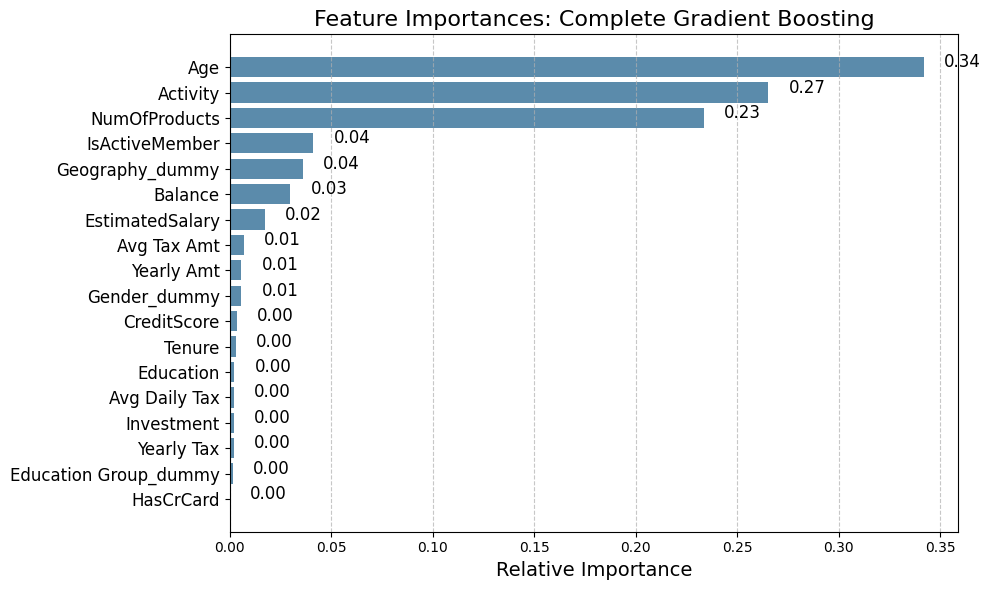

In [73]:

# Fit Gradient Boosting model with best hyperparameters
model = GradientBoostingClassifier(max_depth=3, n_estimators=100)
model.fit(X_train, y_train)

# Calculate feature importances
importances = model.feature_importances_
indices = np.argsort(importances)

# Print feature importances
#print('Feature Importances:')
#print(importances[indices])
#print([features[i] for i in indices])

# Plot feature importances
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Feature Importances: Complete Gradient Boosting', fontsize=16)
ax.barh(range(len(indices)), importances[indices], align='center', color='#5B8BAB')
ax.set_yticks(range(len(indices)))
ax.set_yticklabels([features[i] for i in indices], fontsize=12)
ax.set_xlabel('Relative Importance', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)
for i, v in enumerate(importances[indices]):
    ax.text(v + 0.01, i, f'{v:.2f}', fontsize=12)
plt.tight_layout()
plt.show()

# Save the model
with open('gb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the list of features
with open('features.txt', 'w') as f:
    for feature in features:
        f.write(feature + '\n')


In [74]:
# Make predictions on test data
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

# Compute and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
#plot_confusion_matrix(cm, target_names=['Not Churned', 'Churned'], normalize=False)
#plot_confusion_matrix(cm, target_names=['Not Churned', 'Churned'], normalize=True, title='Confusion Matrix (Normalized)')

# Compute and display classification report
classification_report_df = classification_report_to_dataframe(y_test, y_pred, y_pred_prob, model_name='Gradient Boosting (Sklearn)')
classification_report_df


,Model,Balanced,Accuracy,Balanced_Accuracy,AUC,precision_0,recall_0,f1-score_0,precision_1,recall_1,f1-score_1
0,Gradient Boosting (Sklearn),no,0.844393,0.696573,0.837947,0.86147,0.955534,0.906067,0.728916,0.437613,0.546893


# Deploy Model

In [75]:

# Load the saved model
with open('gb_model.pkl', 'rb') as f:
    model = pickle.load(f)

# Load the saved feature scaler
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load the saved list of features
with open('features.txt', 'r') as f:
    features = f.read().splitlines()


# Define a function to make predictions on new data
def predict_churn(data):
    data = scaler.transform(data)
    predictions = model.predict(data)
    churn_probabilities = model.predict_proba(data)[:,1]
    return predictions, churn_probabilities




# Calculate Churn probabilities from Mock data

In [76]:
# Create a DataFrame with the new data (one row)
new_data = pd.DataFrame({
    'CreditScore': [619.0],
    'Age': [42],
    'Tenure': [2.0],
    'Balance': [0.0],
    'NumOfProducts': [1.0],
    'HasCrCard': [1.0],
    'IsActiveMember': [1.0],
    'EstimatedSalary': [10134888],
    'Education': [2.10065],
    'Investment': [8788.980503],
    'Activity': [2.199133],
    'Yearly Amt': [12527.07338],
    'Avg Daily Tax': [0.683584],
    'Yearly Tax': [249.508249],
    'Avg Tax Amt': [48.280455],
    'Geography': ['Germany'],
    'Gender': ['Male'],
    'Education Group': ['High school graduate']
})

# Encode categorical features
for feature in ['Geography', 'Gender', 'Education Group']:
    le = LabelEncoder()
    le.fit(new_data[feature])
    new_data[feature + '_dummy'] = le.transform(new_data[feature])

# Select only the relevant features
new_data = new_data[features]

# Make predictions on the new data
predictions, churn_probabilities = predict_churn(new_data)

# Print the predictions and churn probabilities
#The value 0 typically represents a prediction of "not churned" or "not at risk of churning," 
# while the value 1 typically represents a prediction of "churned" or "at risk of churning."
print('Predicted class labels:', predictions)

if predictions[0] == 0:
    print('The customer is predicted to NOT churn or NOT be at risk of churning.')
else:
    print('The customer is predicted to churn or be at risk of churning.')
    
print('Churn probabilities:', [f'{prob:.2%}' for prob in churn_probabilities])

Predicted class labels: [0]
The customer is predicted to NOT churn or NOT be at risk of churning.
Churn probabilities: ['25.15%']
